# 05.03 Principal Component Analysis


In [3]:
# Load libraries
import pandas as pd
import numpy as np
from math import log

import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_palette("Blues")


import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import category_encoders as ce

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn import metrics

Read and load data into X and y

In [4]:
df = pd.read_csv("data/05.00 Incident Data.csv")

y = df.SLAFail

X = df.drop(['SLAFail'], axis='columns')
# Set `Open_Time_HourOfDay` for recognition as a Categorical variable
X.Open_Time_HourOfDay = X.Open_Time_HourOfDay.astype('object')

Encode categorical variables


In [5]:
X_enc = ce.WOEEncoder().fit_transform(X,y)


Standardize the data


In [6]:
X_std = StandardScaler().fit_transform(X_enc)

In [7]:
X_std.shape

(35208, 9)

Create Covariance Matrix

In [8]:
covar_matrix = PCA(n_components=9) # create covariance matrix

In [9]:
pcLabels = ['PC 01', 'PC 02', 'PC 03', 'PC 04', 'PC 05', 'PC 06', 'PC 07', 'PC 08', 'PC 09']

Calculate Eigenvalues

In [10]:
covar_matrix.fit(X_std)
#calculate variance ratios
variance = covar_matrix.explained_variance_ratio_ 
variance

array([0.22351785, 0.1374504 , 0.11905445, 0.11118585, 0.10552156,
       0.10145   , 0.08752921, 0.06944988, 0.04484082])

In [11]:
#cumulative sum of variance explained with [n] features
varianceCummSum=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
varianceCummSum

array([ 22.4,  36.1,  48. ,  59.1,  69.7,  79.8,  88.6,  95.5, 100. ])

In [12]:
screeDF = pd.DataFrame({'Principal Components':pcLabels, 'Explained Variance':covar_matrix.explained_variance_ratio_ , 'Cumulative Variance' : varianceCummSum})
screeDF

,Principal Components,Explained Variance,Cumulative Variance
0,PC 01,0.223518,22.4
1,PC 02,0.137450,36.1
2,PC 03,0.119054,48.0
3,PC 04,0.111186,59.1
4,PC 05,0.105522,69.7
5,PC 06,0.101450,79.8
6,PC 07,0.087529,88.6
7,PC 08,0.069450,95.5
8,PC 09,0.044841,100.0


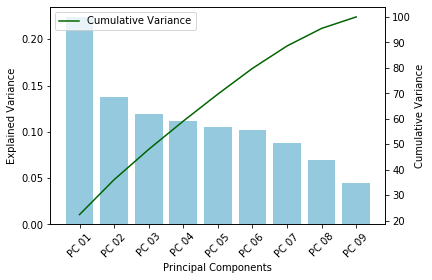

In [13]:
# plt.figure(figsize=(200,5))
fig, ax = plt.subplots()
ax.set_xticklabels(labels=pcLabels,  rotation=45)
ax2 = ax.twinx()
sns.barplot(x='Principal Components', y='Explained Variance', data=screeDF, ax=ax, color='skyblue')
sns.lineplot(x='Principal Components', y='Cumulative Variance', data=screeDF, ax=ax2, color='darkgreen', label="Cumulative Variance")
#sns.lineplot(x='Principal Components', y='Explained Variance', data=screeDF, ax=ax, color='midnightblue', label="Explained Variance" )

plt.savefig("reports/05.03.a PCA Explained and Cummulative Variance.png")